<a href="https://colab.research.google.com/github/sobatrangga/Tugas_iot/blob/main/Tugas_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import signal #menerapkan pemfilteran sinyal/data
import matplotlib.pyplot as plt
import pandas as pd #memuat data dari file ARFF
from scipy.io.arff import loadarff 

In [4]:
data = pd.read_csv('data_1604_accel_watch.arff', comment='@', header=None)
t = data[0].values
x = data[1].values

In [5]:
# LPF Filter
fc = 50  # Cut-off frequency
w = fc / (1000 / 2)  # Normalize the frequency
b, a = signal.butter(5, w, 'low')
y_lpf = signal.filtfilt(b, a, x)

Pada filter LPF, kita menggunakan frekuensi cutoff 50 Hz. Frekuensi cut-off ini dipilih berdasarkan karakteristik data yang akan diolah. Jika datanya misalnya data EEG, kita bisa memilih frekuensi cut-off 50 Hz, karena frekuensi maksimum sinyal EEG sekitar 30-40 Hz.

In [6]:
# MVA Filter
window_sizes = [10, 50, 100]  # Window sizes
y_mva = np.zeros((len(window_sizes), len(x)))
for i, size in enumerate(window_sizes):
    b = np.ones(size) / size
    y_mva[i, :] = np.convolve(x, b, mode='same')



Pada filter MVA kita menggunakan tiga ukuran jendela yang berbeda yaitu 10, 50 dan 100. Pemilihan ukuran jendela ini tergantung dari karakteristik data yang sedang diproses. Jika ada fluktuasi data yang cepat, kita dapat memilih ukuran jendela yang lebih kecil. Namun, jika ada fluktuasi data yang lebih lambat, kita dapat memilih ukuran jendela yang lebih besar

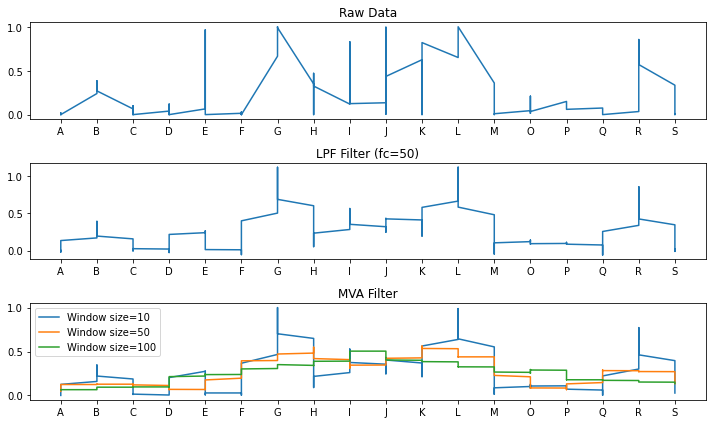

In [7]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Raw Data')
plt.subplot(3, 1, 2)
plt.plot(t, y_lpf)
plt.title(f'LPF Filter (fc={fc})')
plt.subplot(3, 1, 3)
for i, size in enumerate(window_sizes):
    plt.plot(t, y_mva[i, :], label=f'Window size={size}')
plt.title('MVA Filter')
plt.legend()
plt.tight_layout()
plt.show()

Setelah pemfilteran sinyal/data, kami memplot data asli dan hasil yang difilter menggunakan library Matplotlib. Pada grafik hasil filter MVA, kita dapat melihat bahwa ukuran jendela yang lebih besar menghasilkan plot data yang lebih halus. Ini karena ukuran jendela yang lebih besar dapat menghilangkan fluktuasi kecil pada data. Namun, ukuran jendela yang lebih besar juga dapat memengaruhi waktu respons filter.